## Part A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the data

In [2]:
users_df = pd.read_csv ("BX-Users.csv",sep = ";",  encoding= "Latin-1",)
users_df.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [3]:
rating_df = pd.read_csv ("BX-Book-Ratings.csv",sep = ";",  encoding= "Latin-1",)
rating_df.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [4]:
books_df = pd.read_csv ('BX-Books.csv', sep='";"', encoding='Latin-1',engine='python')
books_df.head(2)

,"""ISBN",Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,"Image-URL-L"""
0,"""0195153448",Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,"""0002005018",Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [5]:
books_df['ISBN'] = books_df['"ISBN'].str.replace('"', '')
books_df['Image-URL-L"'] = books_df['Image-URL-L"'].str.replace('"', '')


In [6]:
user_rating_df = pd.merge(rating_df, users_df,on="User-ID", how='outer')
user_rating_df.head()

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0.0,"tyler, texas, usa",NaN
1,276726,0155061224,5.0,"seattle, washington, usa",NaN
2,276727,0446520802,0.0,"h, new south wales, australia",16.0
3,276729,052165615X,3.0,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6.0,"rijeka, n/a, croatia",16.0


In [7]:
final_merge_df = pd.merge(user_rating_df,books_df,on='ISBN',how='outer')
final_merge_df.head(2)

,User-ID,ISBN,Book-Rating,Location,Age,"""ISBN",Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,"Image-URL-L"""
0,276725.0,034545104X,0.0,"tyler, texas, usa",NaN,"""034545104X",Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313.0,034545104X,5.0,"cincinnati, ohio, usa",23.0,"""034545104X",Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


## 

## Display data by book popularity

## 


In [8]:
book_popularity_df = final_merge_df.groupby(by='Book-Title').count().sort_values(by='User-ID',ascending = False)
book_popularity_df.head(5)

,User-ID,ISBN,Book-Rating,Location,Age,"""ISBN",Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,"Image-URL-L"""
Book-Title,,,,,,,,,,,,
Wild Animus,2502,2502,2502,2502,2141,2502,2502,2502,2502,2502,2502,2502
The Lovely Bones: A Novel,1295,1295,1295,1295,920,1295,1295,1295,1295,1295,1295,1295
The Da Vinci Code,898,899,898,898,708,899,899,899,899,899,899,899
A Painted House,838,838,838,838,517,838,838,838,838,838,838,838
The Nanny Diaries: A Novel,828,828,828,828,573,828,828,828,828,828,828,828


Text(0.5, 1.0, 'Book Popularity')

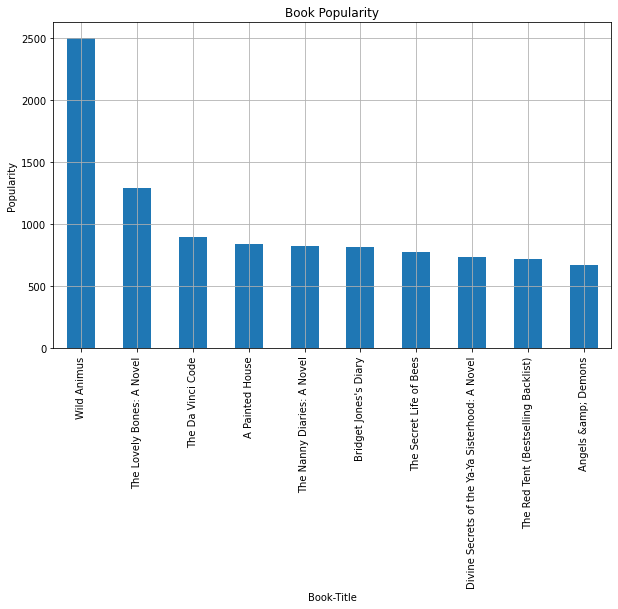

In [10]:
book_popularity_df['Books'] = book_popularity_df['User-ID']
graph1 = book_popularity_df['Books'][:10].plot.bar(figsize = (10,6),legend = False,grid = True)
graph1.set_xlabel("Book-Title")
graph1.set_ylabel("Popularity")
graph1.set_title("Book Popularity")

## 

## Display by Author popularity

## 

In [11]:
book_author_df = final_merge_df.groupby(by='Book-Author').count().sort_values(by='User-ID',ascending = False)
book_author_df.head(5)

,User-ID,ISBN,Book-Rating,Location,Age,"""ISBN",Book-Title,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,"Image-URL-L"""
Book-Author,,,,,,,,,,,,
Stephen King,10053,10055,10053,10053,7664,10055,10055,10055,10055,10055,10055,10055
Nora Roberts,8429,8429,8429,8429,6407,8429,8429,8429,8429,8429,8429,8429
John Grisham,6010,6010,6010,6010,4168,6010,6010,6010,6010,6010,6010,6010
James Patterson,5845,5845,5845,5845,4096,5845,5845,5845,5845,5845,5845,5845
Mary Higgins Clark,4777,4778,4777,4777,3372,4778,4778,4778,4778,4778,4778,4778


Text(0.5, 1.0, 'Author Popularity')

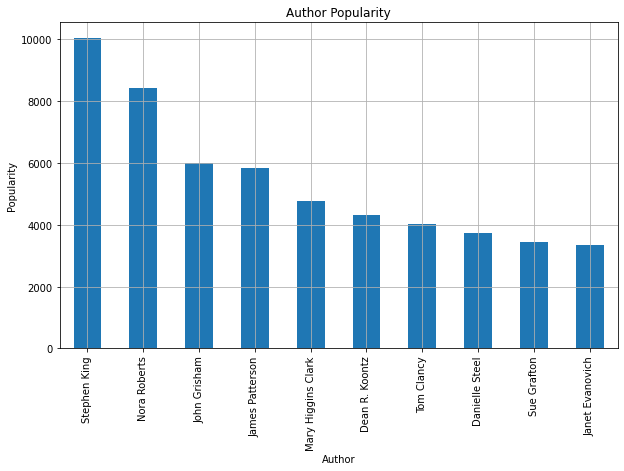

In [12]:
graph2 = book_author_df['ISBN'][:10].plot.bar(figsize = (10,6),grid = True)
graph2.set_xlabel("Author")
graph2.set_ylabel("Popularity")
graph2.set_title("Author Popularity")

## 

## Display by age group reading activity

## 

In [13]:
pie1 = final_merge_df.groupby('Age').count()
pie1.head()

,User-ID,ISBN,Book-Rating,Location,"""ISBN",Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,"Image-URL-L"""
Age,,,,,,,,,,,,
0.0,1215,947,947,1215,561,561,561,561,561,561,561,561
1.0,761,569,569,761,428,428,428,428,428,428,428,428
2.0,400,341,341,400,321,321,321,321,321,321,321,321
3.0,221,193,193,221,143,143,143,143,143,143,143,143
4.0,604,586,586,604,271,271,271,271,271,271,271,271


In [14]:
age_groups = pd.cut(final_merge_df['Age'], bins=[0,10,20, 30,40,50, np.inf])

age_ranges_df= final_merge_df.groupby(age_groups).count().sort_values(by='User-ID', ascending=False)

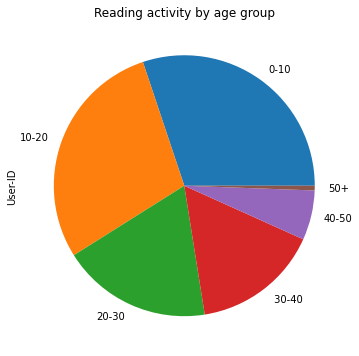

In [15]:
pie1 = age_ranges_df['User-ID'].plot.pie(labels =['0-10','10-20','20-30',' 30-40','40-50','50+', np.inf] ,title = 'Reading activity by age group',figsize=(10,6))

# ['0-30','bbb','ccc','ddd','eee','0-300','bb0b','cc0c','dd0d','ee0e','4535','ewrwer']